## tflearn rnn experiment
use with tensorlab enviorment

tasks:

    [ ] create data set for training
        [ ] sin
        [ ] sales tpv day
    
    [ ] plot sin

    

In [51]:
import numpy as np
import tensorflow as tf
import tflearn
import matplotlib.pyplot as plt
%matplotlib inline

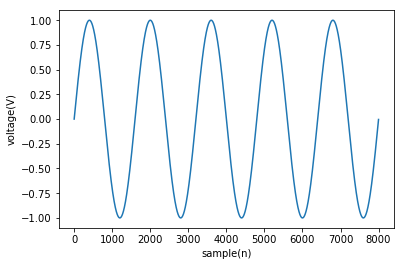

In [52]:
#for referece

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

In [53]:
#create data points::

SEQ_LEN = 31
def create_time_series():
  freq = (np.random.random()*0.5) + 0.1  # 0.1 to 0.6
  ampl = np.random.random() + 0.5  # 0.5 to 1.5
  x = np.sin(np.arange(0,SEQ_LEN) * freq) * ampl
  return x

In [54]:
#create groups of data

train_features = []
train_next_point = []

test_features = []
test_next_point = []

for i in range(100):
    x = create_time_series()
    train_features.append(x[:30])
    train_next_point.append(x[30])
    
for i in range(10):
    x = create_time_series()
    test_features.append(x[:30])
    test_next_point.append(x[30])
    

In [55]:
train_features = np.array(train_features)
train_next_point = np.array(train_next_point)
test_features = np.array(test_features)
test_next_point = np.array(test_next_point)

In [56]:
train_features.shape

(100, 30)

In [57]:
train_features = np.reshape(train_features, (-1, 100, 30))
#train_next_point = np.reshape(train_next_point, (-1, 10000, 30))

In [58]:
train_features.shape


(1, 100, 30)

In [61]:
# Define the neural network
def build_model():
    # This resets all parameters and variables, leave this here
    tf.reset_default_graph()
    
    #### Your code ####
    # Include the input layer, hidden layer(s), and set how you want to train the model
    
    # input layer
    
    net = tflearn.input_data(shape=[None, 100, 30])
    net = tflearn.lstm(net, n_units=100, return_seq=True)
    net = tflearn.lstm(net, n_units=100, return_seq=False)
    net = tflearn.fully_connected(net, 1, activation='linear')
    
    #Output Layer
    net = tflearn.regression(net, optimizer='sgd', loss='mean_square', learning_rate=0.001)
    
    # This model assumes that your network is named "net"  
    model = tflearn.DNN(net, clip_gradients=0.0, tensorboard_verbose=0)
    
    return model

In [62]:
model = build_model()

In [63]:
# Training
model.fit(train_features, train_next_point, n_epoch=1, validation_set=0.1, show_metric=True, batch_size=30)

#model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=19)

---------------------------------
Run id: AEAQAY
Log directory: /tmp/tflearn_logs/
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'list' object has no attribute 'name'
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 0
Validation samples: 1
--


Exception in thread Thread-11:
Traceback (most recent call last):
  File "/Users/pedrobirmann/anaconda/envs/tensorlab/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/pedrobirmann/anaconda/envs/tensorlab/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/pedrobirmann/anaconda/envs/tensorlab/lib/python3.6/site-packages/tflearn/data_flow.py", line 201, in fill_batch_ids_queue
    ids = self.next_batch_ids()
  File "/Users/pedrobirmann/anaconda/envs/tensorlab/lib/python3.6/site-packages/tflearn/data_flow.py", line 215, in next_batch_ids
    batch_start, batch_end = self.batches[self.batch_index]
IndexError: list index out of range



In [ ]:
# Compare the labels that our model predicts with the actual labels

# Find the indices of the most confident prediction for each item. That tells us the predicted digit for that sample.
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)